<a href="https://colab.research.google.com/github/bmshambu/machine_learning_examples/blob/master/Traffic_sign_recog_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# setting up the path to extract the files
target_file_path = 'drive/My Drive/Deep_learning/BelgiumTSC_Training.zip'
target_dir = 'drive/My Drive/Dl_project'

# extracting the files of training datasets
import zipfile
with zipfile.ZipFile(target_file_path,"r") as zip_ref:
    zip_ref.extractall(target_dir)

In [0]:
# setting up the path to extract the files
target_file_path = 'drive/My Drive/Deep_learning/BelgiumTSC_Testing.zip'
target_dir = 'drive/My Drive/Dl_project'

# extracting the files of testing datasets
import zipfile
with zipfile.ZipFile(target_file_path,"r") as zip_ref:
    zip_ref.extractall(target_dir)

In [0]:
# import the necessary modules
import os
import random
import skimage.io
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras

# Allow image embeding in notebook
%matplotlib inline

In [0]:
def load_data(data_dir):
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]

    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
    return images, labels # these provide you data in numpy arrays

In [0]:
# Load training and testing datasets.
ROOT_PATH_TRAIN = 'drive/My Drive/Dl_project/Training'
train_images, train_labels = load_data(ROOT_PATH_TRAIN)

ROOT_PATH_TEST = 'drive/My Drive/Dl_project/Testing'
test_images, test_labels = load_data(ROOT_PATH_TEST)

In [9]:
print('The total number of images in the training dataset :',len(train_images))
print('The total number of labels in the training dataset :',len(train_labels))
print('The total number of unique labels in the training dataset :',len(set(train_labels)))

print('The total number of images in the testng dataset :',len(test_images))
print('The total number of labels in the testing dataset :',len(test_labels))
print('The total number of unique labels in the testing dataset :',len(set(test_labels)))

The total number of images in the training dataset : 4575
The total number of labels in the training dataset : 4575
The total number of unique labels in the training dataset : 62
The total number of images in the testng dataset : 2520
The total number of labels in the testing dataset : 2520
The total number of unique labels in the testing dataset : 53


In [0]:
# # plotting the images
# np.random.seed(20)
# index=np.random.randint(0,4575,25)
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[index[i]], cmap=plt.cm.binary)
#     plt.xlabel(train_labels[index[i]])
# plt.show()

In [19]:
from keras.utils import np_utils

# Resize images
images64 = [skimage.transform.resize(image, (32, 32), mode='constant')
                for image in train_images]

X_train=np.array(images64).reshape(-1,32,32,3)  

# # Resize images
test_images64 = [skimage.transform.resize(image, (32, 32), mode='constant')
                for image in test_images]

X_test=np.array(test_images64).reshape(-1,32,32,3) 

# encoding the categorical features y labels
num_classes =len(set(train_labels)) 
# le = LabelEncoder()
# sign_label = le.fit_transform(train_labels)

y_train = np_utils.to_categorical(train_labels,num_classes=num_classes)
y_test = np_utils.to_categorical(test_labels,num_classes=num_classes)

print('The shape of the X_train is:',X_train.shape)
print('The shape of the X_test is:',X_test.shape)
print('The encoded labels shape is:',y_train.shape)
print('The encoded labels shape is:',y_test.shape)

The shape of the X_train is: (4575, 32, 32, 3)
The shape of the X_test is: (2520, 32, 32, 3)
The encoded labels shape is: (4575, 62)
The encoded labels shape is: (2520, 62)


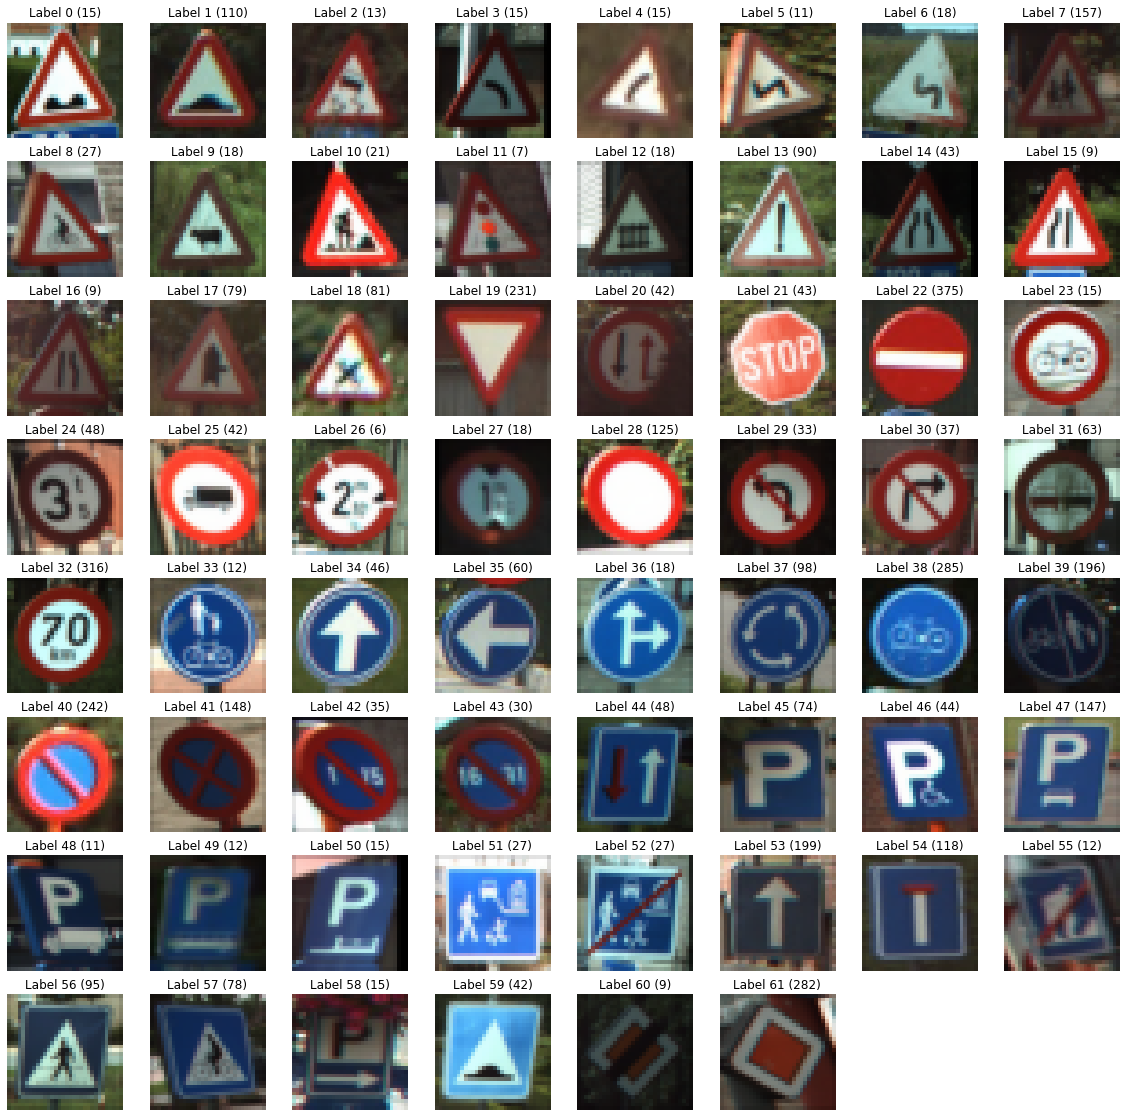

In [11]:
# plotting the Different traffic signs in the dataset
unique_labels = set(train_labels)
plt.figure(figsize=(20,20))
i = 1
for label in unique_labels:
    image = X_train[train_labels.index(label)]
    plt.subplot(8, 8, i)
    plt.axis('off')
    plt.title("Label {0} ({1})".format(label, train_labels.count(label)))
    i += 1
    plt.imshow(image)
plt.show()

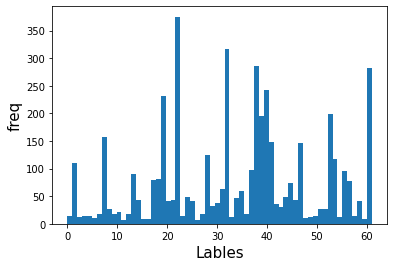

In [12]:
# histogram plot for lables in the training dataset
plt.hist(train_labels,bins=62)
plt.xlabel('Lables',size =15)
plt.ylabel('freq',size =15)
plt.show()

In [0]:
from tensorflow.keras import Sequential,models
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential ,load_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten, Dropout,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
# # # normalization
# X_train = X_train/255.
# X_test = X_test/255.
# print('The shape of the train images is :',X_train.shape)
# print('The shape of the test images is :',X_test.shape)
# print('The shape of the test label is :',y_train.shape)

The shape of the train images is : (4575, 32, 32, 3)
The shape of the test images is : (2520, 32, 32, 3)
The shape of the test label is : (4575, 62)


In [22]:
model = Sequential([
            Conv2D(64,3,padding='same',activation='relu',input_shape=(32,32,3)),
            Conv2D(64,3,padding='same',activation='relu'),
            MaxPooling2D(),
            Dropout(0.2),
            Conv2D(64,3,padding='same',activation='relu'),
            Conv2D(64,3,padding='same',activation='relu'),
            MaxPooling2D(),
            Conv2D(128,3,padding='same',activation='relu'),
            MaxPooling2D(),
            Dropout(0.1),
            Flatten(),
            Dense(120,activation='relu'),
            Dense(120,activation='relu'),
            Dense(120,activation='relu'),
            Dense(62,activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)         

In [23]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),callbacks=[earlystop])
model.save('model_traffic_sign_weights.h5')

Epoch 1/100
143/143 [==============================] - 1s 10ms/step - loss: 2.9762 - accuracy: 0.2675 - val_loss: 1.9370 - val_accuracy: 0.4313
Epoch 2/100
143/143 [==============================] - 1s 9ms/step - loss: 1.4146 - accuracy: 0.5812 - val_loss: 1.3495 - val_accuracy: 0.5956
Epoch 3/100
143/143 [==============================] - 1s 8ms/step - loss: 0.8984 - accuracy: 0.7281 - val_loss: 0.8121 - val_accuracy: 0.7393
Epoch 4/100
143/143 [==============================] - 1s 9ms/step - loss: 0.6207 - accuracy: 0.8079 - val_loss: 0.7113 - val_accuracy: 0.7675
Epoch 5/100
143/143 [==============================] - 1s 8ms/step - loss: 0.3913 - accuracy: 0.8796 - val_loss: 0.4899 - val_accuracy: 0.8706
Epoch 6/100
143/143 [==============================] - 1s 9ms/step - loss: 0.2880 - accuracy: 0.9060 - val_loss: 0.4128 - val_accuracy: 0.8877
Epoch 7/100
143/143 [==============================] - 1s 9ms/step - loss: 0.1908 - accuracy: 0.9414 - val_loss: 0.4439 - val_accuracy: 0.877

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

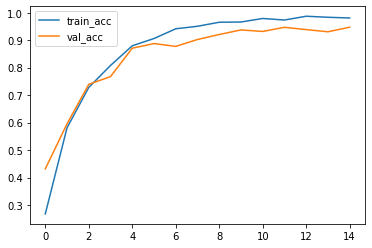

In [25]:
import pandas as pd
val_acc = history.history.get('val_accuracy')
acc = history.history.get('accuracy')
overfit_info = pd.DataFrame({'train_acc':acc, 'val_acc':val_acc})
overfit_info.plot.line()

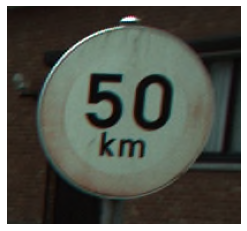

The prdicted label for the test image is : 32
-------------------------------------------------


In [26]:
# prediction on single images
index=np.random.randint(0,2520,2)
test =test_images[index[0]]
plt.imshow(test)
plt.axis('off')
plt.show()
# Resize images
image_test = skimage.transform.resize(test, (32, 32), mode='constant')
test_im=np.array(image_test).reshape(-1,32,32,3) 
pred=model.predict(test_im)
label=np.argmax(pred)
print('The prdicted label for the test image is :',label)
print('-------------------------------------------------')

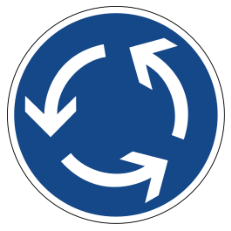

The prdicted label for the test image is : 37
-------------------------------------------------


In [35]:
#Evaluation of the model using image from internet
from imageio import imread
url='https://traffic-rules.com/img/europe/de/signs/mandatory/mandatory-direction-roundabout.png'
image = imread(url)
# loading the saved model
model_1=load_model('model_traffic_sign_weights.h5')
test =image
plt.imshow(test)
plt.axis('off')
plt.show()
# Resize images
image_test = skimage.transform.resize(test, (32, 32,3), mode='constant')
test_im=np.array(image_test).reshape(-1,32,32,3) 
pred=model_1.predict(test_im)
label=np.argmax(pred)
print('The prdicted label for the test image is :',label)
print('-------------------------------------------------')

Second Iteration

In [47]:
model_2 = Sequential([
            Conv2D(64,3,padding='same',activation='relu',input_shape=(32,32,3)),
            Conv2D(64,3,padding='same',activation='relu'),
            MaxPooling2D(),
            Dropout(0.2),
            Conv2D(64,3,padding='same',activation='relu'),
            Conv2D(64,3,padding='same',activation='relu'),
            MaxPooling2D(),
            Conv2D(128,3,padding='same',activation='relu'),
            Conv2D(128,3,padding='same',activation='relu'),
            Conv2D(128,3,padding='same',activation='relu'),
            MaxPooling2D(),
            Dropout(0.1),
            Conv2D(512,3,padding='same',activation='relu'),
            Conv2D(512,3,padding='same',activation='relu'),
            MaxPooling2D(),
            Flatten(),
            Dense(120,activation='relu'),
            Dense(512,activation='relu'),
            Dense(512,activation='relu'),
            Dense(62,activation='softmax')
])
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 8, 8, 64)        

In [49]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_2.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),callbacks=[earlystop])
model.save('model_2_traffic_sign_weights.h5')

Epoch 1/100
143/143 [==============================] - 2s 16ms/step - loss: 0.2458 - accuracy: 0.9440 - val_loss: 0.5831 - val_accuracy: 0.8833
Epoch 2/100
143/143 [==============================] - 2s 15ms/step - loss: 0.2295 - accuracy: 0.9462 - val_loss: 0.4907 - val_accuracy: 0.9302
Epoch 3/100
143/143 [==============================] - 2s 15ms/step - loss: 0.1065 - accuracy: 0.9738 - val_loss: 0.2331 - val_accuracy: 0.9496
Epoch 4/100
143/143 [==============================] - 2s 14ms/step - loss: 0.0929 - accuracy: 0.9768 - val_loss: 0.2786 - val_accuracy: 0.9302
Epoch 5/100
143/143 [==============================] - 2s 15ms/step - loss: 0.0865 - accuracy: 0.9766 - val_loss: 0.2906 - val_accuracy: 0.9433
Epoch 6/100
143/143 [==============================] - 2s 15ms/step - loss: 0.1203 - accuracy: 0.9648 - val_loss: 0.2772 - val_accuracy: 0.9417
